In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [16]:
beer = pd.read_csv("beer.txt", sep = ' ')

In [17]:
X=beer.drop('name',axis=1)

In [18]:
#AgglomerativeClustering
cl = AgglomerativeClustering(n_clusters=3,distance_threshold=None)                   
clustering = cl.fit(X)

In [19]:
clustering

AgglomerativeClustering(n_clusters=3)

In [20]:
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1],
      dtype=int64)

In [21]:
beer['cluster'] = clustering.labels_
beer.sort_values(by = 'cluster')

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
2,Lowenbrau,157,15,0.9,0.48,0
3,Kronenbourg,170,7,5.2,0.73,0
4,Heineken,152,11,5.0,0.77,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
16,Hamms,139,19,4.4,0.43,0


In [22]:
centers = beer.groupby('cluster').mean()
centers

,calories,sodium,alcohol,cost
cluster,,,,
0,150.00,17.0,4.521429,0.520714
1,102.75,10.0,4.075000,0.440000
2,70.00,10.5,2.600000,0.420000


Text(0, 0.5, 'alcohol')

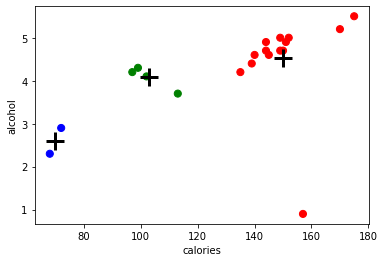

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
colors = np.array(['red','green','blue','yellow','purple'])
plt.scatter(beer.calories, beer.alcohol, c = colors[beer.cluster], s = 50 )
plt.scatter(centers.calories, centers.alcohol, linewidths = 3, marker = '+' , s = 300, c = 'black')
plt.xlabel('calories')
plt.ylabel('alcohol')

In [24]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn import metrics
k_range = range(2,20)
scores = []
for k in k_range:
    cl = AgglomerativeClustering(n_clusters=k,distance_threshold=None)
    cl.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled,cl.labels_))

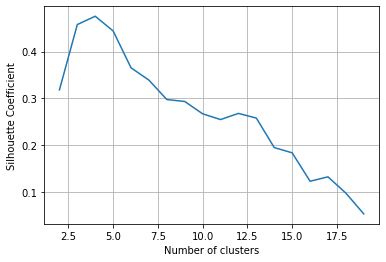

In [25]:
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)